# DISNEY MOVIES & BOX OFFICE SUCCESS

## Veri Setinin İncelenmesi

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("disney_movies_total_gross.csv")
df.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   MPAA_rating               523 non-null    object
 4   total_gross               579 non-null    object
 5   inflation_adjusted_gross  579 non-null    object
dtypes: object(6)
memory usage: 27.3+ KB


In [4]:
df["inflation_adjusted_gross"] = df["inflation_adjusted_gross"].str.replace("$","")
df["total_gross"] = df["total_gross"].str.replace("$","")

In [5]:
df["inflation_adjusted_gross"] = df["inflation_adjusted_gross"].str.replace(",","")
df["total_gross"] = df["total_gross"].str.replace(",","")

In [6]:
# inflation_adjusted_gross ve total_gross kolonlarini numerik degere donusturme

df["inflation_adjusted_gross"] = pd.to_numeric(df["inflation_adjusted_gross"])
df["total_gross"] = pd.to_numeric(df["total_gross"])

In [7]:
# gerekli degisiklikler yapildiktan sonra, kolonlarin veri tiplerinin gosterilmesi

df.dtypes 

movie_title                 object
release_date                object
genre                       object
MPAA_rating                 object
total_gross                  int64
inflation_adjusted_gross     int64
dtype: object

In [8]:
df["release_year"] = pd.DatetimeIndex(df["release_date"]).year

# veri setine filmin sadece cikis yili bilgisini tasiyan bir kolon ekledik.

## Eksik Verilerin İncelenmesi  

In [9]:
df.isna().sum()

movie_title                  0
release_date                 0
genre                       17
MPAA_rating                 56
total_gross                  0
inflation_adjusted_gross     0
release_year                 0
dtype: int64

In [10]:
import missingno as msno

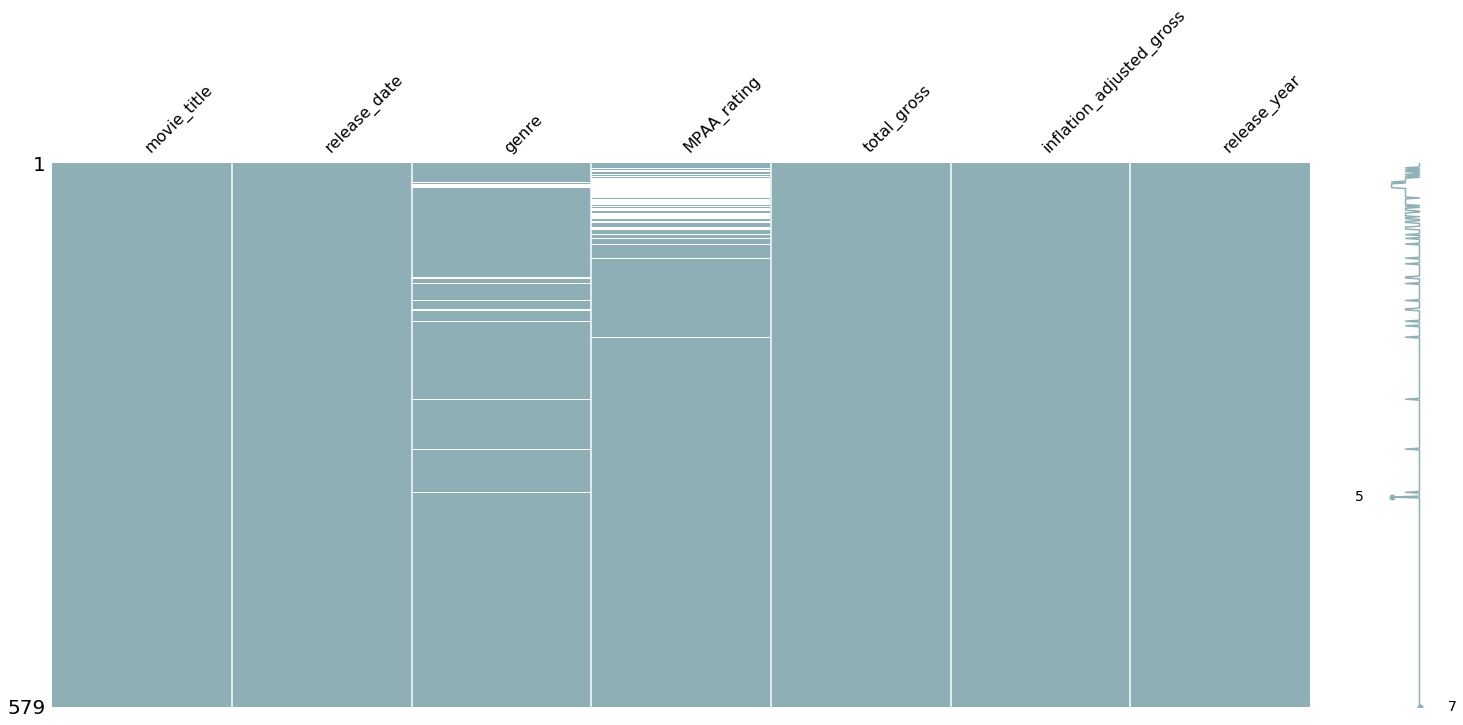

In [11]:
# Eksik degerlerin gosterilmesi

msno.matrix(df, color = (0.56,0.69,0.71));

## Filmlerin Türleri, Yılları ve Kazançlar Arası İlişkilerin İncelenmesi 

In [12]:
# En yuksek gise gelirine sahip ilk 10 Disney filmi

inflation_adjusted_gross_desc = df.sort_values(by = "inflation_adjusted_gross", ascending = False)
inflation_adjusted_gross_desc.head(10)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,release_year
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,184925485,5228953251,1937
1,Pinocchio,"Feb 9, 1940",Adventure,G,84300000,2188229052,1940
2,Fantasia,"Nov 13, 1940",Musical,G,83320000,2187090808,1940
8,101 Dalmatians,"Jan 25, 1961",Comedy,G,153000000,1362870985,1961
6,Lady and the Tramp,"Jun 22, 1955",Drama,G,93600000,1236035515,1955
3,Song of the South,"Nov 12, 1946",Adventure,G,65000000,1078510579,1946
564,Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015",Adventure,PG-13,936662225,936662225,2015
4,Cinderella,"Feb 15, 1950",Drama,G,85000000,920608730,1950
13,The Jungle Book,"Oct 18, 1967",Musical,Not Rated,141843000,789612346,1967
179,The Lion King,"Jun 15, 1994",Adventure,G,422780140,761640898,1994


In [13]:
# veri setinin genre ve release_year kolonlarina gore gruplanmasi

group = df.groupby(["genre", "release_year"])
group = group.mean()

In [14]:
genre_ryear = group.reset_index()
genre_ryear.head(10)

,genre,release_year,total_gross,inflation_adjusted_gross
0,Action,1981,0.0,0.0
1,Action,1982,26918576.0,77184895.0
2,Action,1988,17577696.0,36053517.0
3,Action,1990,59249588.5,118358772.0
4,Action,1991,28924936.5,57918572.5
5,Action,1992,29028000.0,58965304.0
6,Action,1993,21943553.5,44682157.0
7,Action,1994,19180582.0,39545796.0
8,Action,1995,63037553.5,122162426.5
9,Action,1996,135281096.0,257755262.5


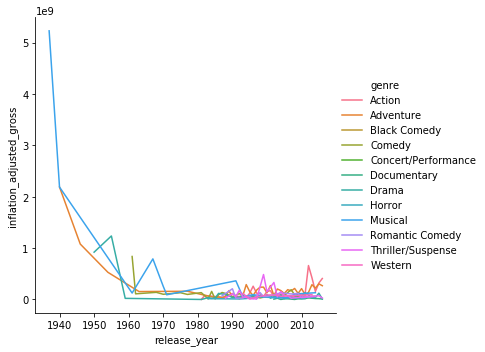

In [15]:
sns.relplot(kind = "line",
            x = "release_year",  
            y = "inflation_adjusted_gross", 
            hue = "genre",
            data = genre_ryear);

# Yillara gore hangi film turu revacta?

## Veri Dönüşümü 

In [16]:
genre_dummies = pd.get_dummies(df["genre"], drop_first = True)

# drop_first = True yaparak bir dummy degiskeni atmis oluyoruz.
# Bunu yapmamizin sebebi degiskenler arasindaki bagimliligi onlemek.

In [17]:
genre_dummies.head()

,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western
0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0


___

## Model Kurma İşlemi

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
# model olusturma
reg = LinearRegression()

In [20]:
reg.fit(genre_dummies, df["inflation_adjusted_gross"]) 

# film turleri bagimsiz degiskenler 
# elde edilen kazanc bagimli degisken

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
Action = reg.intercept_
Adventure = reg.coef_[0]

In [22]:
print(f"Action icin katsayi : {Action}")
print(f"Adventure icin katsayi : {Adventure}")

Action icin katsayi : 102921757.36842084
Adventure icin katsayi : 87475654.70909858


## Bootstrap Yöntemi ile Güven Aralıklarının Hesaplanması

In [23]:
# Bahsettigimiz orneklem alma islemini yapabilmek icin
# 0'dan toplam genre gozlem sayisina kadar olan sayilardan olusan bir dizi yaratalim :

indices = np.arange(0, len(df["genre"]))

In [24]:
# Cogaltma islemi icin, 500 elemanlik dizi yaratalim :

size = 500
action_replicates = np.empty(size)
adventure_replicates = np.empty(size) 
# empty() metodu, girisleri baslatmadan; istenilen boyut ve turde yeni bir dizi olusturmak icin kullanilir.

In [25]:
for i in range(size):
    # yeni orneklem icin yeni indisler olusturma :
    bs_indices = np.random.choice(indices, len(indices))

    # yeni orneklemin "genre" ve "inflation_adjusted_gross" kolonlarinin alinmasi
    bs_genre = df["genre"][bs_indices]
    bs_gross = df["inflation_adjusted_gross"][bs_indices]
    
    # bs_genre icin one-hot encoding :
    bs_dummies = pd.get_dummies(bs_genre, drop_first = True)
    
    # regresyon modelinin kurulmasi ve fit edilmesi :
    reg = LinearRegression().fit(bs_dummies, bs_gross)
    
    # tahmini kesme noktasi ve katsayinin her orneklem icin hesaplanmasi
    action_replicates[i] = reg.intercept_         
    adventure_replicates[i] = reg.coef_[[0]][0]
    
# 500 kere, 579 adet random deger olusturuldu. Bu degerlerin araligi da 0-579.

In [26]:
# kesme noktasi ve "adventure"in katsayisi icin guven araliklarinin hesaplanmasi

confidence_interval_action = np.percentile(action_replicates, [2.5, 97.5])
confidence_interval_adventure = np.percentile(adventure_replicates, [2.5, 97.5])

print(confidence_interval_action)
print(confidence_interval_adventure)

[6.86436987e+07 1.37197850e+08]
[3.74670220e+07 1.42952149e+08]


**NOTLAR :** 
* Güven aralığının alt ve üst sınırı birbirine ne kadar yakın, yani aralık ne kadar dar ise tahmin etme konusunda da o kadar başarılıyız denebilir.
* Elimizdeki popülasyonu temsil eden örneklemin gözlem sayısı arttıkça güven aralığımız da daralır.

## Sonuç :

 _**Bootstrap metodu ile kesme noktası (β0) ve katsayı (β1) için hesaplanan güven aralıklarının hem alt sınırları hem de üst sınırları pozitif değerlidir yani hesaplanan her iki aralıkta da sıfır değeri mevcut değildir. Buradan hareketle aksiyon ve macera türlerinin, elde edilen kazanç ile önemli ölçüde ilişkili olduğu çıkarımını yapabiliriz. Dolayısıyla ilerleyen senelerde bu türlere ait film sayısının artacağı yönünde bir tahmin yürütebiliriz.**_